In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [77]:
orgdata = pd.read_csv('House_Rent_Dataset.csv')
data = orgdata.copy()

In [78]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


<h2>Checking Null Values</h2>

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Posted On         4746 non-null   object
 1   BHK               4746 non-null   int64 
 2   Rent              4746 non-null   int64 
 3   Size              4746 non-null   int64 
 4   Floor             4746 non-null   object
 5   Area Type         4746 non-null   object
 6   Area Locality     4746 non-null   object
 7   City              4746 non-null   object
 8   Furnishing        4746 non-null   object
 9   Tenant Preferred  4746 non-null   object
 10  Bathroom          4746 non-null   int64 
 11  Point of Contact  4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


<Axes: >

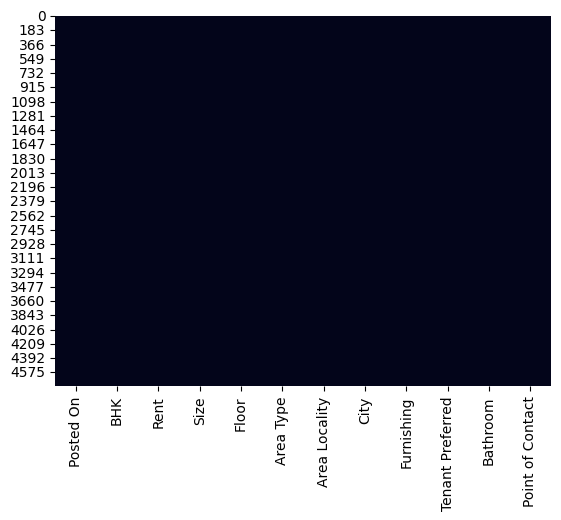

In [80]:
sns.heatmap(data.isnull(),cbar=False)

<h2>Data Cleaning</h2>

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Posted On         4746 non-null   object
 1   BHK               4746 non-null   int64 
 2   Rent              4746 non-null   int64 
 3   Size              4746 non-null   int64 
 4   Floor             4746 non-null   object
 5   Area Type         4746 non-null   object
 6   Area Locality     4746 non-null   object
 7   City              4746 non-null   object
 8   Furnishing        4746 non-null   object
 9   Tenant Preferred  4746 non-null   object
 10  Bathroom          4746 non-null   int64 
 11  Point of Contact  4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [82]:
data['Floor'] = data['Floor'].str.replace('Ground','0')
data['Floor'] = data['Floor'].str.replace('Upper Basement','-1')
data['Floor'] = data['Floor'].str.replace('Lower Basement','-2')
data['Floor_No'] = data['Floor'].str.extract('(-[0-9]|[0-9])')
data['Total_Floors'] = data['Floor'].str.extract('(\s+[0-9])')
data['Total_Floors'] = data['Total_Floors'].fillna(data['Floor_No'])
data['Floor_No'] = data['Floor_No'].astype(int)
data['Total_Floors'] = data['Total_Floors'].astype(int)

In [83]:
data.drop(columns=['Posted On','Floor','Area Locality'],inplace=True,axis=1)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BHK               4746 non-null   int64 
 1   Rent              4746 non-null   int64 
 2   Size              4746 non-null   int64 
 3   Area Type         4746 non-null   object
 4   City              4746 non-null   object
 5   Furnishing        4746 non-null   object
 6   Tenant Preferred  4746 non-null   object
 7   Bathroom          4746 non-null   int64 
 8   Point of Contact  4746 non-null   object
 9   Floor_No          4746 non-null   int64 
 10  Total_Floors      4746 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 408.0+ KB


In [85]:
for i in data:
    print('Value Counts of ',i)
    v = data[i].value_counts()
    print(v)
    print('\n')

Value Counts of  BHK
BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64


Value Counts of  Rent
Rent
15000    275
10000    248
12000    238
20000    175
8000     162
        ... 
4600       1
79500      1
76000      1
45002      1
5800       1
Name: count, Length: 243, dtype: int64


Value Counts of  Size
Size
1000    240
600     225
800     220
1200    193
500     192
       ... 
2770      1
1252      1
904       1
721       1
855       1
Name: count, Length: 615, dtype: int64


Value Counts of  Area Type
Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64


Value Counts of  City
City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64


Value Counts of  Furnishing
Furnishing
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64


Value Counts of  Tenant Preferred
Tenant Preferred
Bachelo

<h2>Outlier Detection</h2>

/tmp/ipykernel_17016/3898193275.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BHK'])


<Axes: xlabel='BHK', ylabel='Density'>

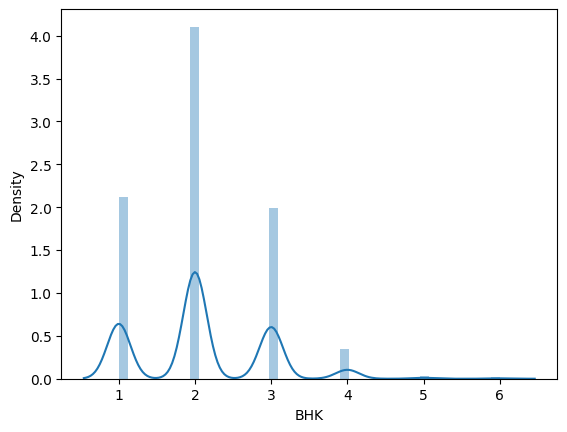

In [86]:
sns.distplot(data['BHK'])

<Axes: >

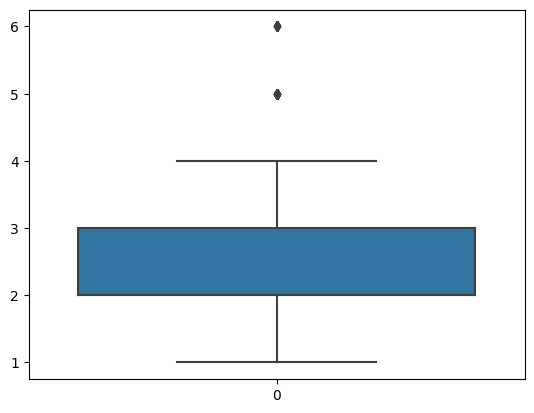

In [87]:
sns.boxplot(data['BHK'])

In [88]:
Q1 = np.percentile(data['BHK'],25,interpolation='midpoint')
Q3 = np.percentile(data['BHK'],75,interpolation='midpoint')
IQR = Q3-Q1
upper = Q3 + 1.5*(IQR)
lower = Q1 - 1.5*(IQR)
data.drop(data[(data['BHK'] > upper)].index,inplace=True,axis=0)
data.drop(data[(data['BHK'] < lower)].index,inplace=True,axis=0)

/tmp/ipykernel_17016/3241640715.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['BHK'],25,interpolation='midpoint')
/tmp/ipykernel_17016/3241640715.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['BHK'],75,interpolation='midpoint')


<Axes: >

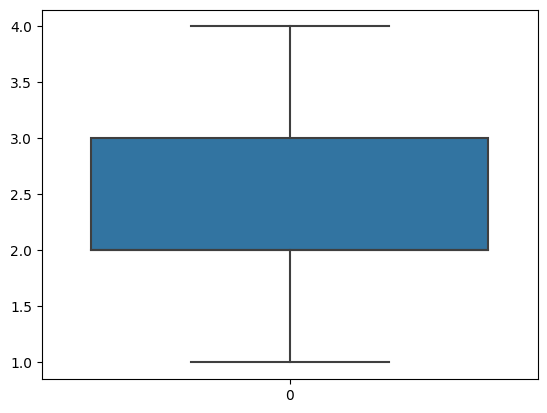

In [89]:
sns.boxplot(data['BHK'])

/tmp/ipykernel_17016/3898193275.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BHK'])


<Axes: xlabel='BHK', ylabel='Density'>

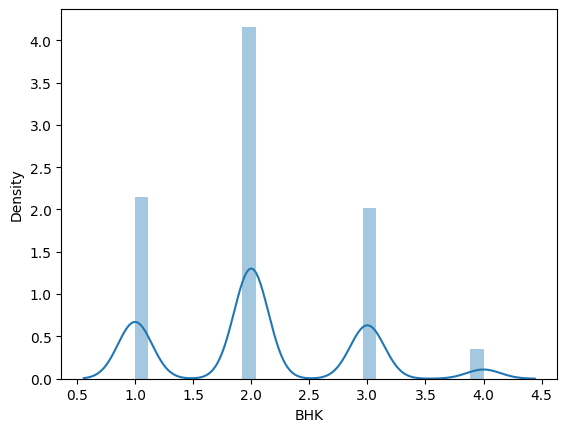

In [90]:
sns.distplot(data['BHK'])

/tmp/ipykernel_17016/1729628872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

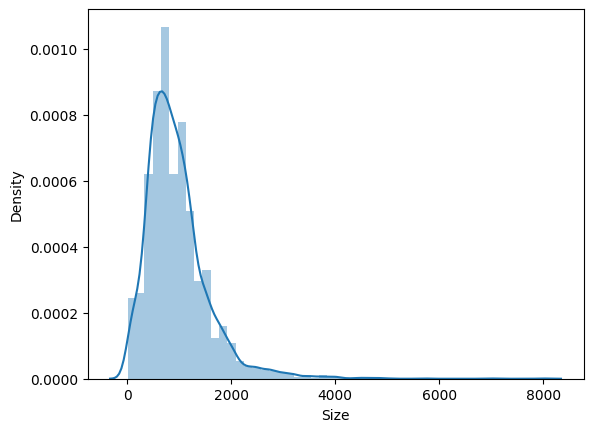

In [91]:
sns.distplot(data['Size'])

<Axes: >

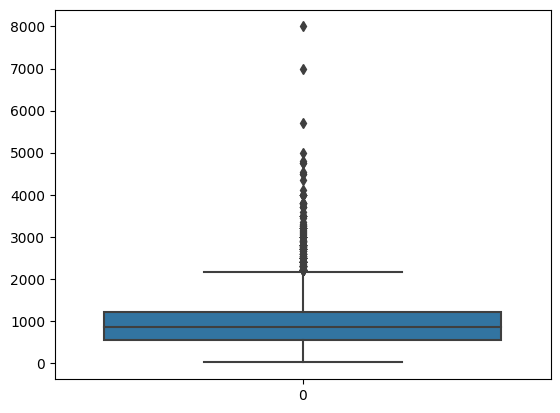

In [92]:
sns.boxplot(data['Size'])

In [93]:
Q1 = np.percentile(data['Size'],25,interpolation='midpoint')
Q3 = np.percentile(data['Size'],75,interpolation='midpoint')
IQR = Q3-Q1
upper = Q3 + 1.5*(IQR)
lower = Q1 - 1.5*(IQR)
data.drop(data[(data['Size'] >= upper)].index,inplace=True,axis=0)
data.drop(data[(data['Size'] <= lower)].index,inplace=True,axis=0)

/tmp/ipykernel_17016/128814806.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Size'],25,interpolation='midpoint')
/tmp/ipykernel_17016/128814806.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['Size'],75,interpolation='midpoint')


<Axes: >

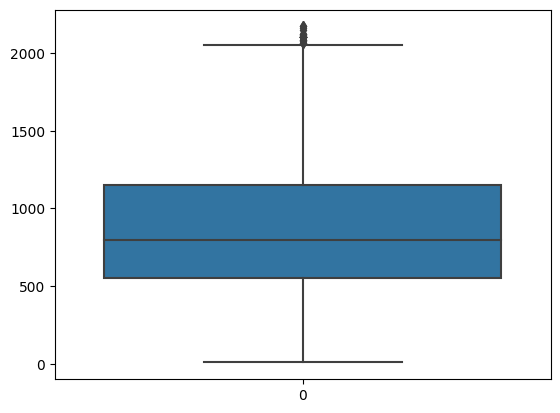

In [94]:
sns.boxplot(data['Size'])

In [95]:
data = data.drop(data[data['Size'] <= 120].index)

In [96]:
# Q1 = np.percentile(data['Size'],25,interpolation='midpoint')
# Q3 = np.percentile(data['Size'],75,interpolation='midpoint')
# IQR = Q3-Q1
# upper = Q3 + 1.5*(IQR)
# lower = Q1 - 1.5*(IQR)
# data.drop(data[(data['Size'] >= upper)].index,inplace=True,axis=0)
# data.drop(data[(data['Size'] <= lower)].index,inplace=True,axis=0)

<Axes: >

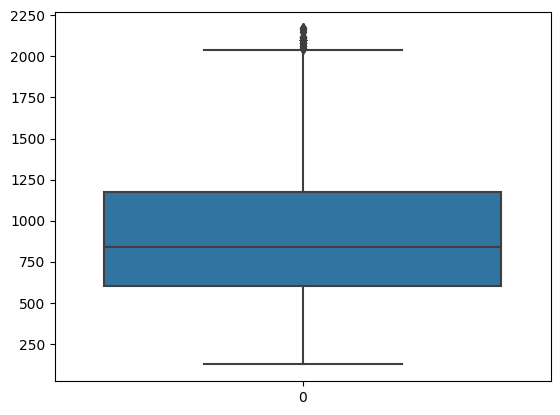

In [97]:
sns.boxplot(data['Size'])

In [98]:
# Q1 = np.percentile(data['Size'],25,interpolation='midpoint')
# Q3 = np.percentile(data['Size'],75,interpolation='midpoint')
# IQR = Q3-Q1
# upper = Q3 + 1.5*(IQR)
# lower = Q1 - 1.5*(IQR)
# data.drop(data[(data['Size'] >= upper)].index,inplace=True,axis=0)
# data.drop(data[(data['Size'] <= lower)].index,inplace=True,axis=0)

<Axes: >

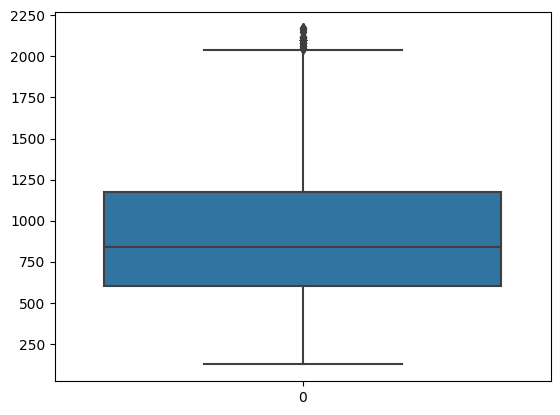

In [99]:
sns.boxplot(data['Size'])

/tmp/ipykernel_17016/1729628872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

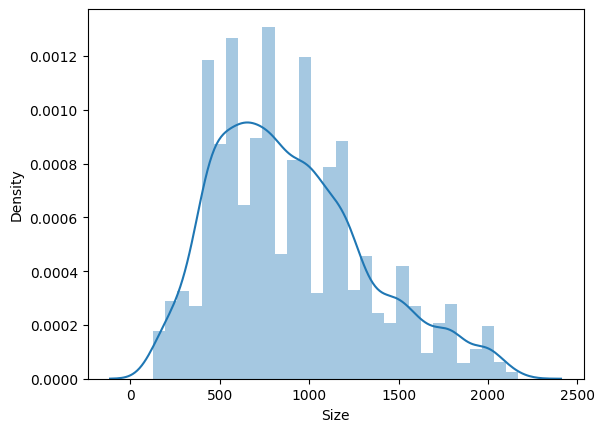

In [100]:
sns.distplot(data['Size'])

/tmp/ipykernel_17016/1219667844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Bathroom'])


<Axes: xlabel='Bathroom', ylabel='Density'>

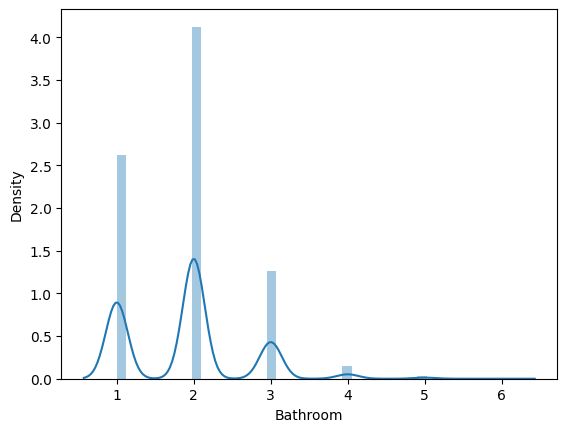

In [101]:
sns.distplot(data['Bathroom'])

<Axes: >

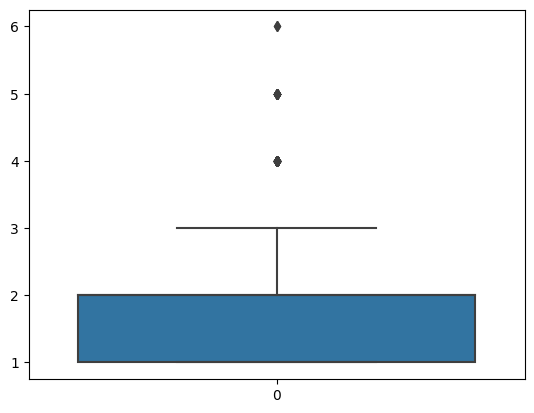

In [102]:
sns.boxplot(data['Bathroom'])

In [103]:
Q1 = np.percentile(data['Bathroom'],25,interpolation='midpoint')
Q3 = np.percentile(data['Bathroom'],75,interpolation='midpoint')
IQR = Q3-Q1
upper = Q3 + 1.5*(IQR)
lower = Q1 - 1.5*(IQR)
data.drop(data[(data['Bathroom'] >= upper)].index,inplace=True,axis=0)
data.drop(data[(data['Bathroom'] <= lower)].index,inplace=True,axis=0)

/tmp/ipykernel_17016/652714580.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Bathroom'],25,interpolation='midpoint')
/tmp/ipykernel_17016/652714580.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['Bathroom'],75,interpolation='midpoint')


<Axes: >

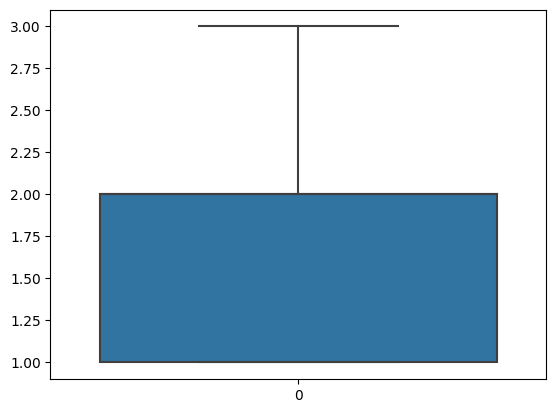

In [104]:
sns.boxplot(data['Bathroom'])

/tmp/ipykernel_17016/1219667844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Bathroom'])


<Axes: xlabel='Bathroom', ylabel='Density'>

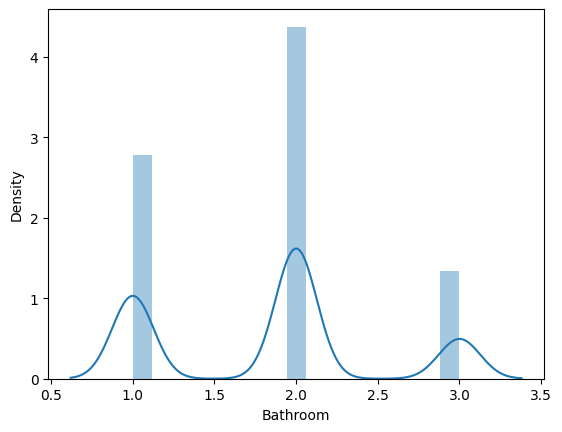

In [105]:
sns.distplot(data['Bathroom'])

<Axes: >

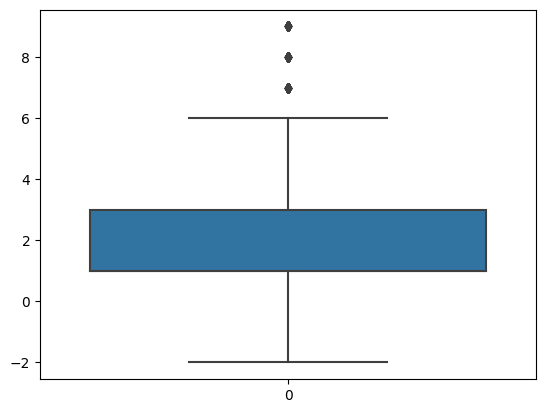

In [106]:
sns.boxplot(data['Floor_No'])

/tmp/ipykernel_17016/2171946568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Floor_No'])


<Axes: xlabel='Floor_No', ylabel='Density'>

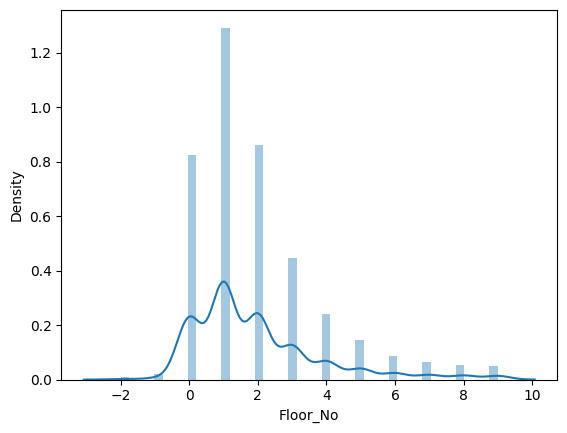

In [107]:
sns.distplot(data['Floor_No'])

In [108]:
Q1 = np.percentile(data['Floor_No'],25,interpolation='midpoint')
Q3 = np.percentile(data['Floor_No'],75,interpolation='midpoint')
IQR = Q3-Q1
upper = Q3 + 1.5*(IQR)
lower = Q1 - 1.5*(IQR)
data.drop(data[(data['Floor_No'] >= upper)].index,inplace=True,axis=0)
data.drop(data[(data['Floor_No'] <= lower)].index,inplace=True,axis=0)

/tmp/ipykernel_17016/49052595.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Floor_No'],25,interpolation='midpoint')
/tmp/ipykernel_17016/49052595.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['Floor_No'],75,interpolation='midpoint')


<Axes: >

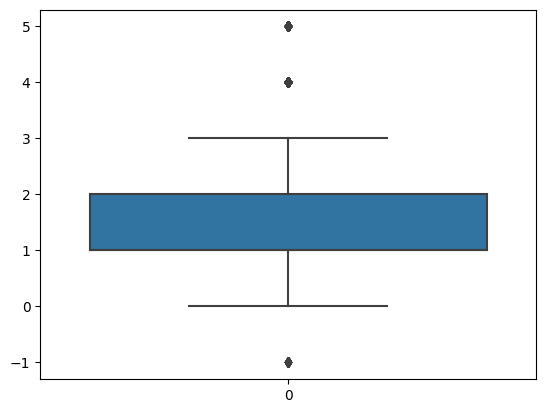

In [109]:
sns.boxplot(data['Floor_No'])

In [110]:
# Q1 = np.percentile(data['Floor_No'],25,interpolation='midpoint')
# Q3 = np.percentile(data['Floor_No'],75,interpolation='midpoint')
# IQR = Q3-Q1
# upper = Q3 + 1.5*(IQR)
# lower = Q1 - 1.5*(IQR)
# data.drop(data[(data['Floor_No'] >= upper)].index,inplace=True,axis=0)
# data.drop(data[(data['Floor_No'] <= lower)].index,inplace=True,axis=0)

<Axes: >

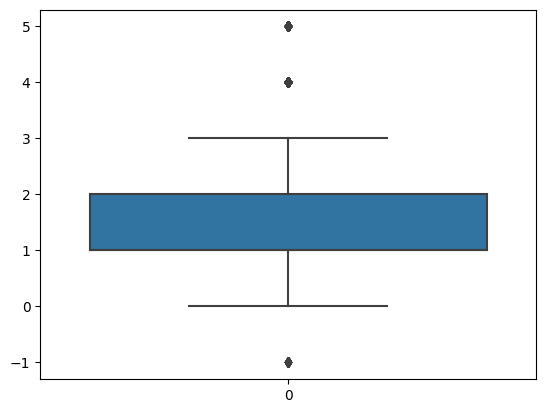

In [111]:
sns.boxplot(data['Floor_No'])

/tmp/ipykernel_17016/2171946568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Floor_No'])


<Axes: xlabel='Floor_No', ylabel='Density'>

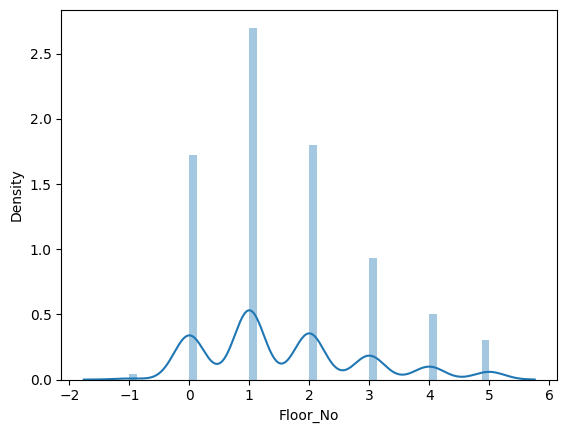

In [112]:
sns.distplot(data['Floor_No'])

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4015 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BHK               4015 non-null   int64 
 1   Rent              4015 non-null   int64 
 2   Size              4015 non-null   int64 
 3   Area Type         4015 non-null   object
 4   City              4015 non-null   object
 5   Furnishing        4015 non-null   object
 6   Tenant Preferred  4015 non-null   object
 7   Bathroom          4015 non-null   int64 
 8   Point of Contact  4015 non-null   object
 9   Floor_No          4015 non-null   int64 
 10  Total_Floors      4015 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 505.4+ KB


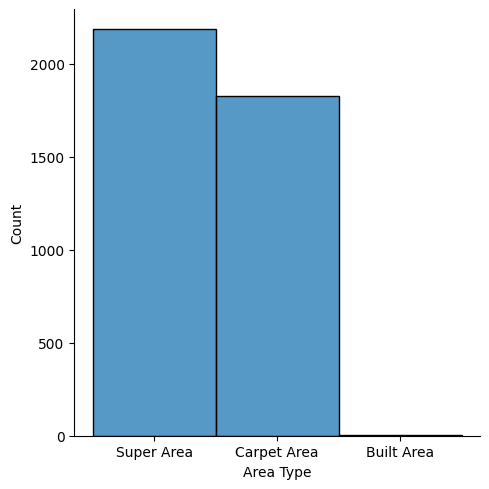

In [114]:
sns.displot(data['Area Type'])

In [115]:
data = data[~data['Area Type'].str.contains('Built Area')]

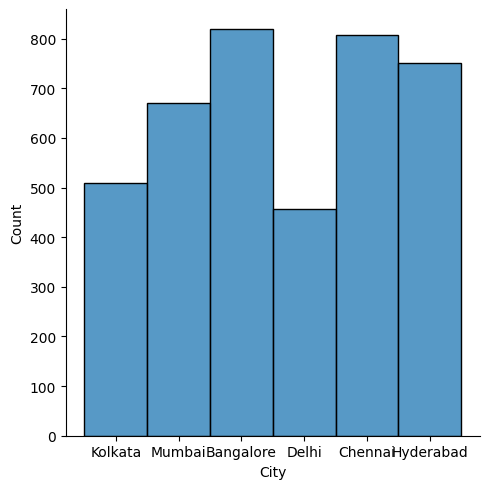

In [116]:
sns.displot(data['City'])

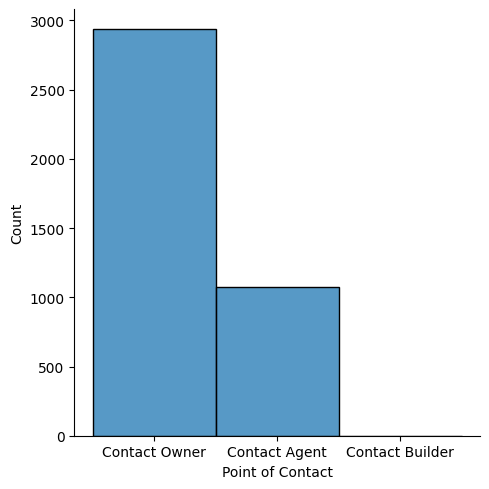

In [117]:
sns.displot(data['Point of Contact'])
#sns.boxplot(x = 'Point of Contact', y = 'Rent', data = data)

In [118]:
data = data[~data['Point of Contact'].str.contains('Contact Builder')]


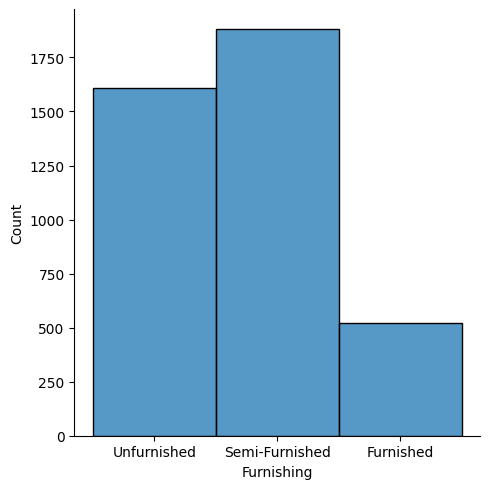

In [119]:
sns.displot(data['Furnishing'])

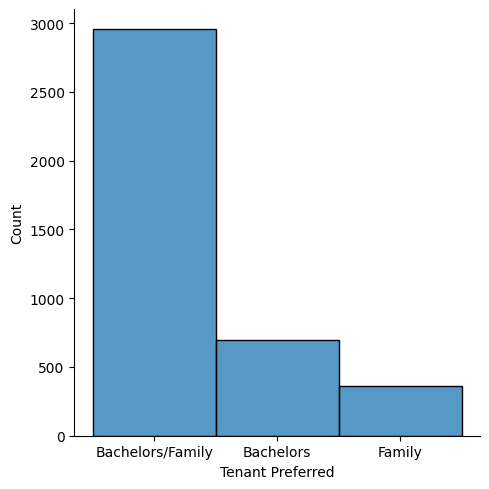

In [120]:
sns.displot(data['Tenant Preferred'])

In [121]:
columns = ['Area Type','City','Furnishing','Tenant Preferred','Point of Contact']
data = pd.get_dummies(data,columns=columns,drop_first=True)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 0 to 4745
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BHK                                4012 non-null   int64
 1   Rent                               4012 non-null   int64
 2   Size                               4012 non-null   int64
 3   Bathroom                           4012 non-null   int64
 4   Floor_No                           4012 non-null   int64
 5   Total_Floors                       4012 non-null   int64
 6   Area Type_Super Area               4012 non-null   bool 
 7   City_Chennai                       4012 non-null   bool 
 8   City_Delhi                         4012 non-null   bool 
 9   City_Hyderabad                     4012 non-null   bool 
 10  City_Kolkata                       4012 non-null   bool 
 11  City_Mumbai                        4012 non-null   bool 
 12  Furnishing_Semi-Furnished

In [123]:
c = data.corr()['Rent'][:].sort_values()
# for i in c:
#     if(abs(i) > 0.3):
#         print(i)
print(c)

Point of Contact_Contact Owner      -0.464002
Area Type_Super Area                -0.290887
City_Kolkata                        -0.161224
Furnishing_Unfurnished              -0.151456
City_Hyderabad                      -0.125910
City_Chennai                        -0.110913
Tenant Preferred_Bachelors/Family   -0.106762
City_Delhi                          -0.006096
Furnishing_Semi-Furnished            0.023981
Total_Floors                         0.086774
Tenant Preferred_Family              0.093991
Floor_No                             0.179330
Size                                 0.291469
BHK                                  0.349399
Bathroom                             0.414509
City_Mumbai                          0.533106
Rent                                 1.000000
Name: Rent, dtype: float64


/tmp/ipykernel_17016/1622857777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

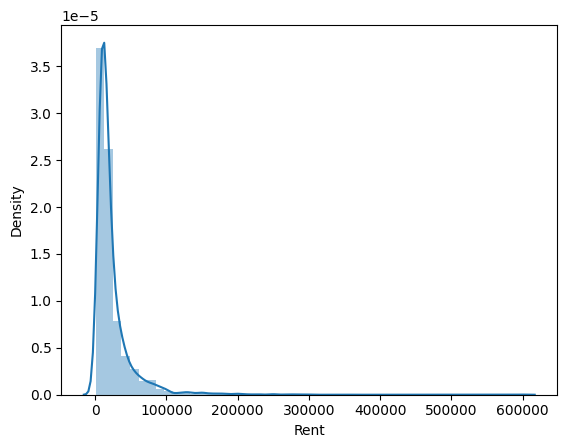

In [124]:
sns.distplot(data['Rent'])

/tmp/ipykernel_17016/1729628872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

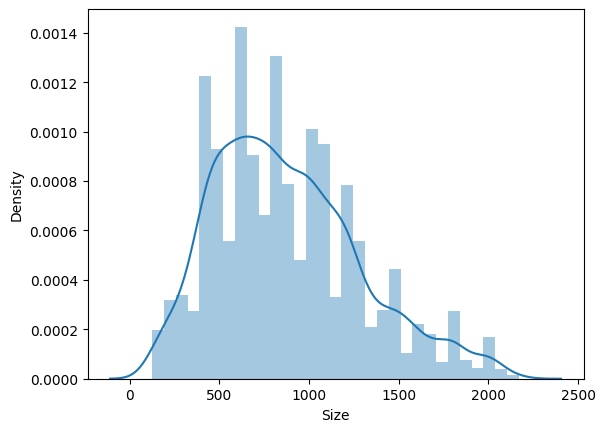

In [125]:
sns.distplot(data['Size'])

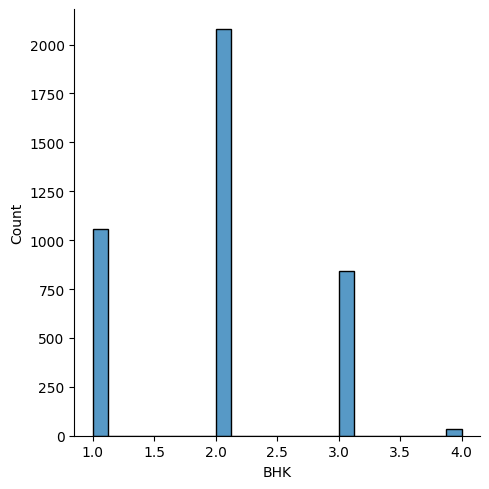

In [126]:
sns.displot(data['BHK'])

In [127]:
print(data['Rent'])

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4012, dtype: int64


/tmp/ipykernel_17016/3009968843.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

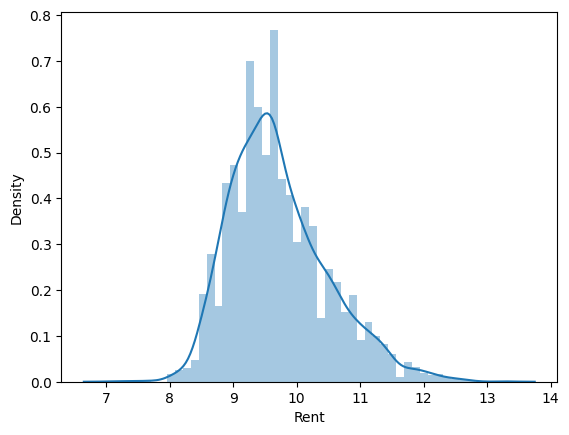

In [128]:
data['Rent'] = np.log1p(data['Rent'])
sns.distplot(data['Rent'])

In [129]:
print(data['Rent'])

0        9.210440
1        9.903538
2        9.741027
3        9.210440
4        8.922792
          ...    
4741     9.615872
4742    10.275086
4743    10.463132
4744    10.714440
4745     9.615872
Name: Rent, Length: 4012, dtype: float64


<Axes: >

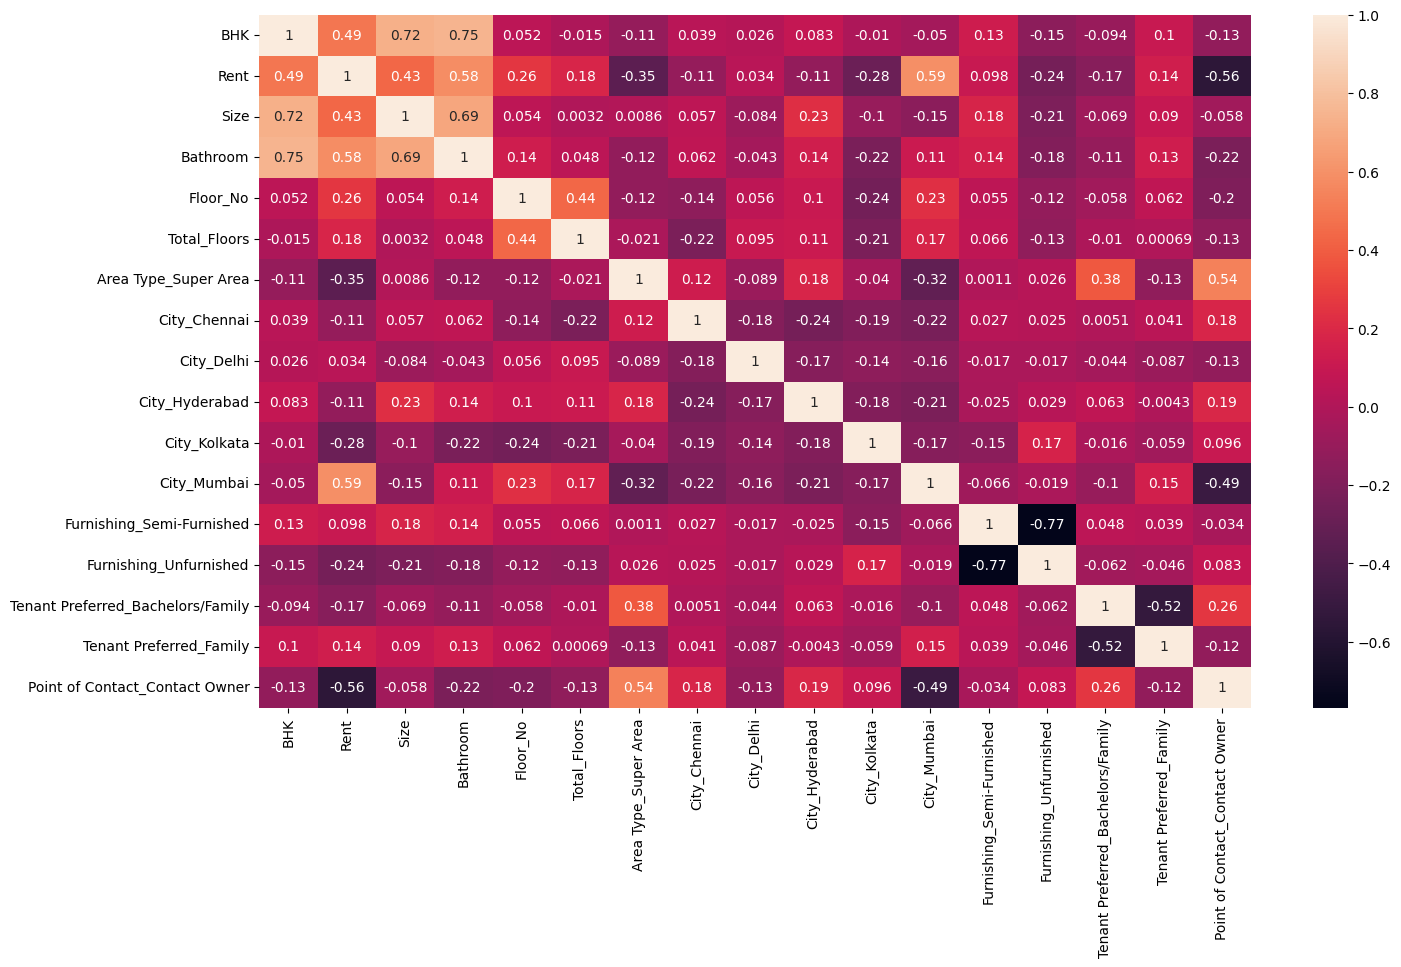

In [130]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)

In [131]:
c = data.corr()['Rent'][:].sort_values()
# for i in c:
#     if(abs(i) > 0.3):
#         print(i)
print(c)

Point of Contact_Contact Owner      -0.560189
Area Type_Super Area                -0.346018
City_Kolkata                        -0.284373
Furnishing_Unfurnished              -0.240107
Tenant Preferred_Bachelors/Family   -0.167210
City_Hyderabad                      -0.113579
City_Chennai                        -0.109299
City_Delhi                           0.034417
Furnishing_Semi-Furnished            0.097908
Tenant Preferred_Family              0.140591
Total_Floors                         0.178535
Floor_No                             0.259564
Size                                 0.433778
BHK                                  0.488954
Bathroom                             0.580807
City_Mumbai                          0.587227
Rent                                 1.000000
Name: Rent, dtype: float64


/tmp/ipykernel_17016/1622857777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

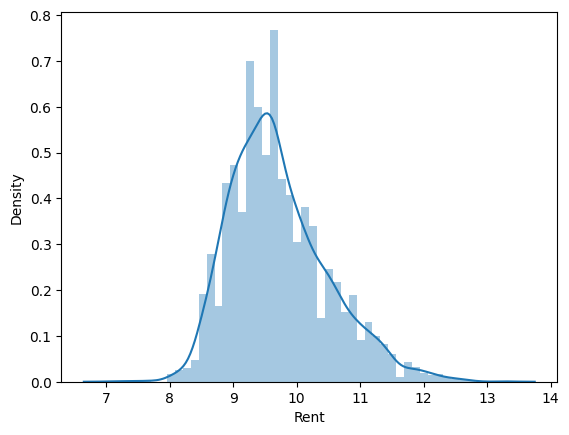

In [132]:
sns.distplot(data['Rent'])

In [133]:
y = data[['Rent']]
x = data[['Size','Bathroom','BHK','City_Mumbai','Point of Contact_Contact Owner']]

In [134]:
# data.to_csv("PreProcessed Data.csv")

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)
# x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=20)

In [136]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression()
# reg.fit(x_train,y_train)
# print('mse train',mean_squared_error(np.expm1(y_train),np.expm1(reg.predict(x_train)),squared=False))
# print('mse test',mean_squared_error(np.expm1(y_test),np.expm1(reg.predict(x_test)),squared=False))
# print('mae train',mean_absolute_error(np.expm1(y_train),np.expm1(reg.predict(x_train))))
# print('mae test',mean_absolute_error(np.expm1(y_test),np.expm1(reg.predict(x_test))))
# print('r2 score train',r2_score(y_train,reg.predict(x_train)))
# print('r2 score test',r2_score(y_test,reg.predict(x_test)))

# print('mse train',mean_squared_error((y_train),(reg.predict(x_train)),squared=False))
# print('mse test',mean_squared_error((y_test),(reg.predict(x_test)),squared=False))
# print('mae train',mean_absolute_error((y_train),(reg.predict(x_train))))
# print('mae test',mean_absolute_error((y_test),(reg.predict(x_test))))
# print('r2 score train',r2_score(y_train,reg.predict(x_train)))
# print('r2 score test',r2_score(y_test,reg.predict(x_test)))

In [137]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'fit_intercept': [True, False],
#               'normalize': [True, False]}
# lr = LinearRegression()
# grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(x_train, y_train)
# print(grid_search.best_params_)
# print('MSE:', -grid_search.best_score_)
# print('mse train',mean_squared_error(np.expm1(y_train),np.expm1(grid_search.predict(x_train)),squared=False))
# print('mse test',mean_squared_error(np.expm1(y_test),np.expm1(grid_search.predict(x_test)),squared=False))
# print('mae train',mean_absolute_error(np.expm1(y_train),np.expm1(grid_search.predict(x_train))))
# print('mae test',mean_absolute_error(np.expm1(y_test),np.expm1(grid_search.predict(x_test))))
# print('r2 score train',r2_score(y_train,grid_search.predict(x_train)))
# print('r2 score test',r2_score(y_test,grid_search.predict(x_test)))

# print('mse train',mean_squared_error((y_train),(grid_search.predict(x_train)),squared=False))
# print('mse test',mean_squared_error((y_test),(grid_search.predict(x_test)),squared=False))
# print('mae train',mean_absolute_error((y_train),(grid_search.predict(x_train))))
# print('mae test',mean_absolute_error((y_test),(grid_search.predict(x_test))))
# print('r2 score train',r2_score(y_train,grid_search.predict(x_train)))
# print('r2 score test',r2_score(y_test,grid_search.predict(x_test)))

In [138]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=15)
dt.fit(x_train,y_train)
print(mean_squared_error(y_train,dt.predict(x_train),squared=False))
print(mean_squared_error(y_test,dt.predict(x_test),squared=False))
print(r2_score(y_train,dt.predict(x_train)))
print(r2_score(y_test,dt.predict(x_test)))

0.32429764896282665
0.4385849139585279
0.8260589312135374
0.6803211725534917


In [139]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Load the Boston Housing dataset

# Define the decision tree model
dt = DecisionTreeRegressor(random_state=42)

# Define the hyper-parameter grid to search over
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Define the cross-validation strategy
cv = 5

# Create a Grid Search object with the defined parameters
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=cv, n_jobs=-1)

# Fit the Grid Search object to the data
grid_search.fit(x, y)

# Print the best hyper-parameters and the corresponding score
print("Best hyper-parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
y_pred = grid_search.predict(x_train)
y_pred_tst = grid_search.predict(x_test)

# Calculate the RMSE

print("Best hyperparameters: ", param_grid)
# print("RMSE: ", rmse2)
# print("RMSE Test",rmse)

print('mse train',mean_squared_error((y_train),(grid_search.predict(x_train)),squared=False))
print('mse test',mean_squared_error((y_test),(grid_search.predict(x_test)),squared=False))
print('mae train',mean_absolute_error((y_train),(grid_search.predict(x_train))))
print('mae test',mean_absolute_error((y_test),(grid_search.predict(x_test))))
print('r2 score train',r2_score(y_train,grid_search.predict(x_train)))
print('r2 score test',r2_score(y_test,grid_search.predict(x_test)))

Best hyper-parameters:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score:  0.6061631947406296
Best hyperparameters:  {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
mse train 0.382656863978798
mse test 0.3721313313981584
mae train 0.2857057492188865
mae test 0.28713787990985673
r2 score train 0.7578226348632413
r2 score test 0.769856364703302


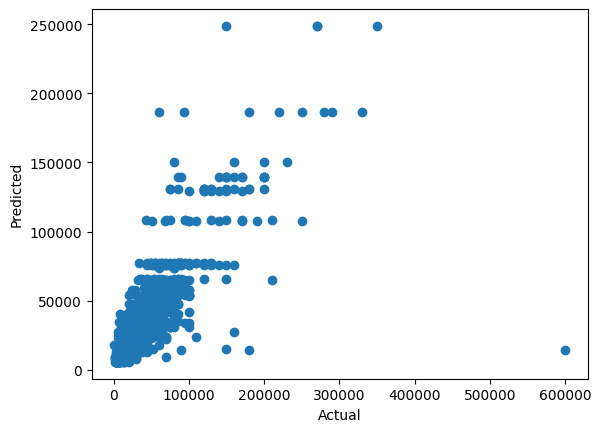

In [140]:
plt.scatter(np.expm1(y_train),np.expm1(y_pred))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

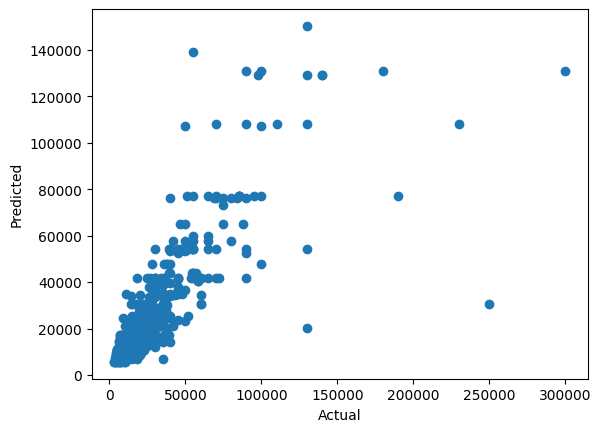

In [141]:
plt.scatter(np.expm1(y_test),np.expm1(y_pred_tst))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [142]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf=1,max_features='sqrt',max_depth=10,min_samples_split=2,random_state=15,n_estimators=500)
rf.fit(x_train,y_train)
print(r2_score(y_train,rf.predict(x_train)))
print(r2_score(y_test,rf.predict(x_test)))

/tmp/ipykernel_17016/1534588894.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.8017663047198378
0.7238335080926759


In [143]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error

# # Define the Random Forest Regressor model
# rf = RandomForestRegressor(random_state=42)

# # Define the hyperparameter grid to search over
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [5, 10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Define the GridSearchCV object
# grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# # Fit the GridSearchCV object to the training data
# grid_rf.fit(x_train, y_train)

# # Get the best hyperparameters and the best score from the GridSearchCV object
# best_params = grid_rf.best_params_
# best_score = grid_rf.best_score_
# grid_search = RandomForestRegressor(random_state=42, **best_params)
# grid_search.fit(x_train, y_train)

# # Make predictions on the test set using the best model

# # Calculate the RMSE

# print("Best hyperparameters: ", best_params)
# print("Best score: ", best_score)
# print('mse train',mean_squared_error((y_train),(grid_search.predict(x_train)),squared=False))
# print('mse test',mean_squared_error((y_test),(grid_search.predict(x_test)),squared=False))
# print('mae train',mean_absolute_error((y_train),(grid_search.predict(x_train))))
# print('mae test',mean_absolute_error((y_test),(grid_search.predict(x_test))))
# print('r2 score train',r2_score(y_train,grid_search.predict(x_train)))
# print('r2 score test',r2_score(y_test,grid_search.predict(x_test)))


In [144]:
# print(mean_absolute_error(np.expm1(y_train),np.expm1(rf_best.predict(x_train))))
# print(mean_absolute_error(np.expm1(y_test),np.expm1(rf_best.predict(x_test))))

In [145]:
y_pred

array([8.63929597, 9.99578147, 9.04871957, ..., 9.04871957, 9.38418846,
       9.56208067])

In [146]:
np.expm1(y_test)

,Rent
4105,13000.0
3002,14000.0
426,5000.0
3097,26000.0
3101,9000.0
...,...
4491,6800.0
1646,12000.0
3886,7000.0
3505,10000.0


In [147]:
pd.DataFrame(np.expm1(y_pred))

,0
0,5648.351087
1,21932.742144
2,8506.637541
3,29671.955524
4,5648.351087
...,...
3204,11897.747908
3205,14214.393052
3206,8506.637541
3207,11897.747908


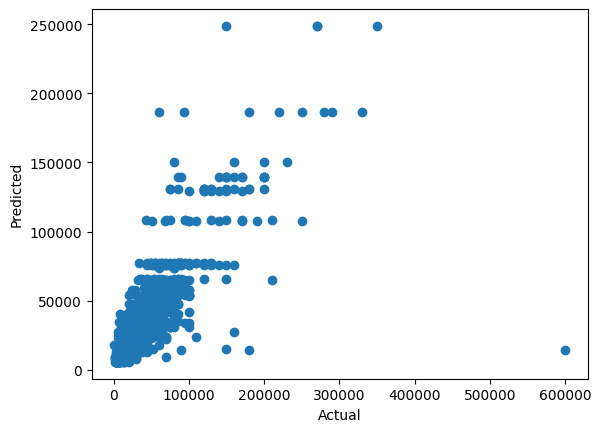

In [148]:
plt.scatter(np.expm1(y_train),np.expm1(y_pred))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

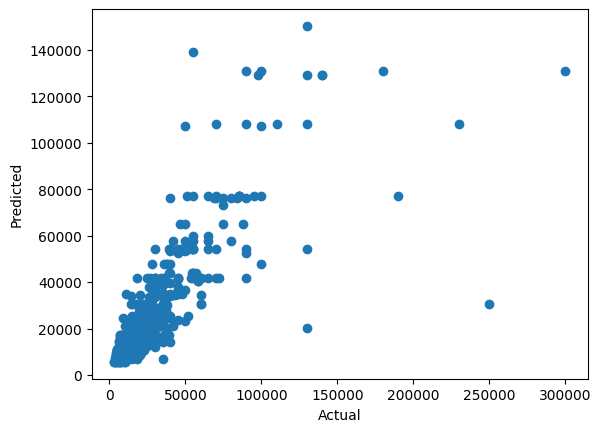

In [149]:
plt.scatter(np.expm1(y_test),np.expm1(y_pred_tst))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [150]:
import pickle

# create a model object
filename = 'model.pkl'
pickle.dump(rf, open(filename, 'wb'))
